# Problem Statement
#### in a competitive market like the restaurant industry, understanding the factors that influence business success is crucial for stakeholders. Utilizing the Yelp dataset, this project aims to investigate the relationship user engagement (reviews, tips and check-ins) and business success metrics (review count, ratings) for restaurants. 

# Research Objectives

# Hypothesis Testing

# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import sqlite3
import folium
from geopy.geocoders import Nominatim
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# Database Connection

In [2]:
# Creating database connection
conn = sqlite3.connect('yelp.db')

In [3]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type = 'table'", conn)

In [4]:
tables

,name
0,business
1,checkin
2,review
3,tip
4,user


In [5]:
# Explore what of data available in the tables
for table in tables ['name']:
    display(pd.read_sql_query(f"SELECT * FROM {table} LIMIT 5",conn))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


# Data Analysis

In [6]:
# Total number of businesses
pd.read_sql_query('SELECT COUNT(*) FROM business', conn)

,COUNT(*)
0,150346


In [7]:
# need to find the business_id from the ' currently Open' restaurant
business_id = pd.read_sql_query("SELECT business_id, review_count FROM business WHERE LOWER(categories) LIKE '%restaurant%' AND is_open = 1", conn)

In [8]:
# What is the descriptive stats for review count and star rating for business ?
# avg, min, max, median

pd.read_sql_query(f"""
SELECT avg(review_count), min(review_count), max(review_count),
(SELECT review_count from business ORDER BY review_count LIMIT 1 OFFSET(SELECT COUNT(*) FROM business)/2) AS median_review_count,

AVG(stars) AS average_star_rating,
MIN(stars) AS min_star_rating,
MAX(stars) AS max_star_rating,
(SELECT stars FROM business ORDER BY stars LIMIT 1 OFFSET (SELECT COUNT(*) FROM business)/2) AS median_star_rating

FROM business 
WHERE business_id IN {tuple(business_id['business_id'])}""", conn).transpose()

,0
avg(review_count),104.097789
min(review_count),5.000000
max(review_count),7568.000000
median_review_count,15.000000
average_star_rating,3.523969
min_star_rating,1.000000
max_star_rating,5.000000
median_star_rating,3.500000


#### Avg=104, Median = 15 & Max= 7568....... Definite presence of Outlier 

# Outlier Removal

In [9]:
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [10]:
business_id = remove_outliers(business_id, 'review_count')

In [11]:
business_id.shape

(31537, 2)

In [12]:
pd.read_sql_query(f"""
SELECT avg(review_count), min(review_count), max(review_count),
(SELECT review_count from business ORDER BY review_count LIMIT 1 OFFSET(SELECT COUNT(*) FROM business)/2) AS median_review_count,

AVG(stars) AS average_star_rating,
MIN(stars) AS min_star_rating,
MAX(stars) AS max_star_rating,
(SELECT stars FROM business ORDER BY stars LIMIT 1 OFFSET (SELECT COUNT(*) FROM business)/2) AS median_star_rating

FROM business 
WHERE business_id IN {tuple(business_id['business_id'])}""", conn).transpose()

,0
avg(review_count),55.975426
min(review_count),5.000000
max(review_count),248.000000
median_review_count,15.000000
average_star_rating,3.477281
min_star_rating,1.000000
max_star_rating,5.000000
median_star_rating,3.500000


 Max Review count changed from 7568 to 248. 
 avg = 55.97

In [13]:
# Which Restaurants have the highest number of reviews ?
# we'll use Restro name as same restro name can have multiple branches with different business_id
pd.read_sql_query(f"""SELECT name, SUM(review_count) AS review_count, AVG(stars) AS avg_rating
FROM business
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY name
ORDER BY review_count DESC LIMIT 10""", conn)

,name,review_count,avg_rating
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,Taco Bell,8017,2.141813
3,Chick-fil-A,7687,3.377419
4,First Watch,6761,3.875000
5,Panera Bread,6613,2.661905
6,Buffalo Wild Wings,6483,2.344828
7,Domino's Pizza,6091,2.290210
8,Wendy's,5930,2.030159
9,Chili's,5744,2.514706


In [14]:
# Which Restaurants have the highest rating ?
pd.read_sql_query(f"""SELECT name, SUM(review_count) AS review_count, AVG(stars) AS avg_rating
FROM business
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY name
ORDER BY avg_rating DESC LIMIT 10""", conn)

,name,review_count,avg_rating
0,ā café,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la cañada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0


### # Observation
So it is clear that Performance isn't hugely based on Hotel Ratings. As Top performers having veery less Rates whereas top Raters aren't equally performing well.

In [15]:
# Do restaurants with higher engagement tend to have higher ratings ?
# Does Rating increase with engagement ?          # User engagement: review_count, tip_count, checkin_count

# checkin Count
pd.read_sql_query("""SELECT business_id,
SUM(length(date)) - (length(replace(date,',',''))+1) AS checkin_count
FROM checkin
GROUP BY business_id""", conn)

,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,9
1,--0iUa4sNDFiZFrAdIWhZQ,8
2,--30_8IhuyMHbSOcNWd6DQ,0
3,--7PUidqRWpRSpXebiyxTg,8
4,--7jw19RH9JKXgFohspgQw,24
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,65
131926,zznZqH9CiAznbkV6fXyHWA,-1
131927,zzu6_r3DxBJuXcjnOYVdTw,21
131928,zzw66H6hVjXQEt0Js3Mo4A,0


In [16]:
# Tip Count
pd.read_sql_query("""SELECT business_id, COUNT(*) AS tip_count
FROM tip
GROUP BY business_id""", conn)

,business_id,tip_count
0,---kPU91CF4Lq2-WlRu9Lw,4
1,--0iUa4sNDFiZFrAdIWhZQ,6
2,--30_8IhuyMHbSOcNWd6DQ,1
3,--7PUidqRWpRSpXebiyxTg,3
4,--8IbOsAAxjKRoYsBFL-PA,4
...,...,...
106188,zzjCxn89a7RQo8keIOO_Ag,1
106189,zzjFdJwXuxBOGe9JeY_EMw,2
106190,zznJox6-nmXlGYNWgTDwQQ,6
106191,zzu6_r3DxBJuXcjnOYVdTw,2


### Combining all: Rate, Review, Checkin, Tip

In [17]:
review_count_df = pd.read_sql_query(f"""SELECT total.avg_rating as rating,
AVG(total.review_count) AS avg_review_count,
AVG(total.checkin_count) AS avg_checkin_count,
AVG(total.tip_count) AS avg_tip_count
FROM
(SELECT
    b.business_id,
    SUM(b.review_count) AS review_count,
    AVG(b.stars) AS avg_rating,
    SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date,',',''))+1) AS checkin_count,
    SUM(tip.tip_count) AS tip_count
FROM
    business b
LEFT JOIN
    checkin cc ON b.business_id = cc.business_id
LEFT JOIN
    (SELECT business_id, COUNT(business_id) AS tip_count FROM tip GROUP BY business_id ORDER BY tip_count) AS tip ON b.business_id = tip.business_id
WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY
    b.business_id) AS total

GROUP BY total.avg_rating

""", conn)

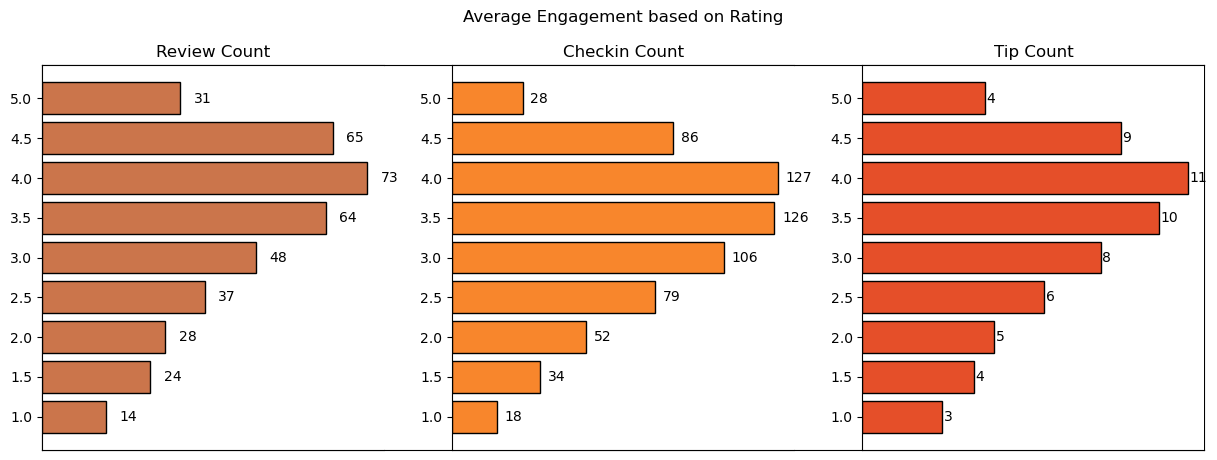

In [18]:
# Plotting the Data

plt.figure(figsize=(15,5))
plt.title('Average Engagement based on Rating\n\n')
plt.yticks([])
plt.xticks([])
plt.subplot(1,3,1)
plt.title("Review Count")
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_review_count'], edgecolor = 'k', color = '#CB754B')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate (review_count_df['avg_review_count']):
    plt.text(value+3, i, str(round(value)), color='black', va='center')

plt.xticks([])
plt.subplot(1,3,2)
plt.title("Checkin Count")
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_checkin_count'], edgecolor = 'k', color = '#F8862C')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate (review_count_df['avg_checkin_count']):
    plt.text(value+3, i, str(round(value)), color='black', va='center')

plt.xticks([])
plt.subplot(1,3,3)
plt.title("Tip Count")
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_tip_count'], edgecolor = 'k', color = '#E54F29')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate (review_count_df['avg_tip_count']):
    plt.text(value+0.05, i, str(round(value)), color='black', va='center')

plt.xticks([])
plt.show()

In [26]:
# is there a correlation between the number of reviews, tips and check-in for a business ?

engagement_df = pd.read_sql_query(f"""SELECT
    b.business_id,
    SUM(b.review_count) AS review_count,
    AVG(b.stars) AS avg_rating,
    SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date,',',''))+1) AS checkin_count,
    SUM(tip.tip_count) AS tip_count,
    (CASE WHEN b.stars >= 3.5 THEN 'High-Rated' ELSE 'Low--Rated' END) AS category
FROM
    business b
LEFT JOIN
    checkin cc ON b.business_id = cc.business_id
LEFT JOIN
    (SELECT business_id, COUNT(business_id) AS tip_count FROM tip GROUP BY business_id ORDER BY tip_count) AS tip ON b.business_id = tip.business_id
WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY
    b.business_id

""", conn).dropna()

In [27]:
engagement_df[['review_count', 'checkin_count', 'tip_count']].corr()

,review_count,checkin_count,tip_count
review_count,1.000000,0.626884,0.766321
checkin_count,0.626884,1.000000,0.772088
tip_count,0.766321,0.772088,1.000000


<Axes: >

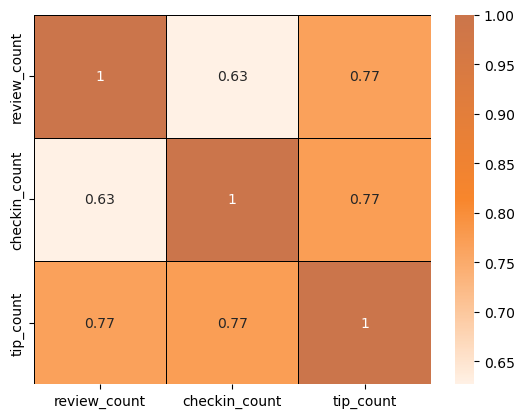

In [28]:
colors = ['#FFF1E5', '#F8862C','#CB754B']
custom_cmap = LinearSegmentedColormap.from_list('mycmap', colors)
sns.heatmap(engagement_df[['review_count','checkin_count','tip_count']].corr(), cmap = custom_cmap, annot=True, linewidths=0.5, linecolor='black')

In [30]:
# is there a difference in the user engagement (reviews, tips and check-ins) between high-rated and low-rated business ?
engagement_df.groupby('category')[['review_count', 'checkin_count', 'tip_count']].mean()

,review_count,checkin_count,tip_count
category,,,
High-Rated,72.291062,122.066641,10.162766
Low--Rated,42.123420,88.880828,6.541689


#### Therefore, High-Rated restro have more engagements

In [36]:
# function to calculate the success score based on the avg rating and total review count.
def calculate_success_metric (df):
    success_score = []
    for index, row in df.iterrows():
        score = row['avg_rating'] * np.log(row['review_count'] + 1)
        success_score.append(score)
    return success_score

In [37]:
# How do the success metrics (review_count or avg_rating) of resttaurants vary across different states and cities ?
city_df = pd.read_sql_query(f'''SELECT city, state, latitude, longitude, AVG(stars) AS avg_rating, SUM(review_count) AS review_count,
COUNT(*) AS restaurant_count
FROM business
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY state, city
ORDER BY review_count DESC
LIMIT 10''', conn)

city_df['success_score'] = calculate_success_metric(city_df)

In [38]:
city_df

,city,state,latitude,longitude,avg_rating,review_count,restaurant_count,success_score
0,Philadelphia,PA,39.955505,-75.155564,3.532156,175487,3001,42.651934
1,Tampa,FL,27.890814,-82.502346,3.571429,104376,1715,41.270588
2,Indianapolis,IN,39.637133,-86.127217,3.412111,92639,1701,39.022521
3,Tucson,AZ,32.338572,-111.010760,3.386187,91613,1419,38.688341
4,Nashville,TN,36.208102,-86.768170,3.493590,87070,1404,39.737764
5,New Orleans,LA,29.963974,-90.042604,3.693676,69239,1012,41.167252
6,Saint Louis,MO,38.583223,-90.407187,3.414303,51490,811,37.042331
7,Reno,NV,39.476518,-119.784037,3.479626,48393,589,37.535187
8,Edmonton,AB,53.436403,-113.604288,3.509379,45916,1546,37.671748
9,Boise,ID,43.611192,-116.206275,3.558824,36104,561,37.346958


In [42]:
# create business map
m = folium.Map(location=[city_df['latitude'].mean(), city_df['longitude'].mean()], zoom_start=4)

# Define a color scale
color_scale = folium.LinearColormap(colors= ['green', 'yellow', '#E54F29'],
                                   vmin=city_df['success_score'].min(),
                                    vmax=city_df['success_score'].max())

# Add markers to the map
for index, row in city_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color_scale(row['success_score']),
        fill=True,
        fill_color=color_scale(row['success_score']),
        fill_opacity=0.7,
        popup=f"Success Score: {row['success_score']}'"
    ).add_to(m)

# Add color scale to the map
m.add_child(color_scale)

In [43]:
# Are there any patterns in user engagement over time for successful business compared to less successful  ones ?
# Are there any seasonal trends in the user engagement for restaurants ?

high_rated_engagement = pd.read_sql_query(f'''
SELECT review.month_year, review.review_count, tip.tip_count FROM
(SELECT strftime('%m-%Y', date) AS month_year, COUNT(*) AS review_count
FROM review
WHERE business_id IN {tuple(business_id['business_id'])} and stars >= 3.5
GROUP BY month_year
ORDER BY month_year) AS review
JOIN
(SELECT AVG(b.stars), strftime('%m-%Y', tip.date) AS month_year, COUNT(*)AS tip_count
FROM tip
JOIN business AS b
ON tip.business_id = b.business_id
WHERE tip.business_id IN {tuple(business_id['business_id'])} and stars >= 3.5
GROUP BY month_year
ORDER BY month_year) AS tip

ON review.month_year = tip.month_year;''', conn)

low_rated_engagement = pd.read_sql_query(f'''
SELECT review.month_year, review.review_count, tip.tip_count FROM
(SELECT strftime('%m-%Y', date) AS month_year, COUNT(*) AS review_count
FROM review
WHERE business_id IN {tuple(business_id['business_id'])} and stars < 3.5
GROUP BY month_year
ORDER BY month_year) AS review
JOIN
(SELECT AVG(b.stars), strftime('%m-%Y', tip.date) AS month_year, COUNT(*)AS tip_count
FROM tip
JOIN business AS b
ON tip.business_id = b.business_id
WHERE tip.business_id IN {tuple(business_id['business_id'])} and stars < 3.5
GROUP BY month_year
ORDER BY month_year) AS tip

ON review.month_year = tip.month_year;''', conn)

In [44]:
high_rated_engagement

,month_year,review_count,tip_count
0,01-2010,1218,79
1,01-2011,2171,621
2,01-2012,3086,1321
3,01-2013,3801,1230
4,01-2014,4973,1357
...,...,...,...
149,12-2017,10161,1477
150,12-2018,12870,1163
151,12-2019,13756,1161
152,12-2020,11294,937


In [45]:
low_rated_engagement

,month_year,review_count,tip_count
0,01-2010,613,25
1,01-2011,1103,297
2,01-2012,1748,538
3,01-2013,2196,548
4,01-2014,2769,607
...,...,...,...
149,12-2017,5970,441
150,12-2018,7574,338
151,12-2019,7591,275
152,12-2020,5014,148


In [46]:
time_rating = pd.read_sql_query(f"""SELECT strftime('%m-%Y', date) AS month_year, AVG(stars) AS avg_rating
FROM review
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY month_year
ORDER BY month_year; """, conn)

In [50]:
time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
time_rating.sort_values('month_year', inplace= True)
time_rating = time_rating[time_rating['month_year']>'2017']

high_rated_engagement['month_year'] = pd.to_datetime(high_rated_engagement['month_year'])
high_rated_engagement.sort_values('month_year', inplace = True)
high_rated_engagement = high_rated_engagement[high_rated_engagement['month_year']>'2017']

low_rated_engagement['month_year'] = pd.to_datetime(low_rated_engagement['month_year'])
low_rated_engagement.sort_values('month_year', inplace = True)
low_rated_engagement = low_rated_engagement[low_rated_engagement['month_year']>'2017']

In [51]:
high_rated_engagement['avg_rating'] = time_rating['avg_rating'].values

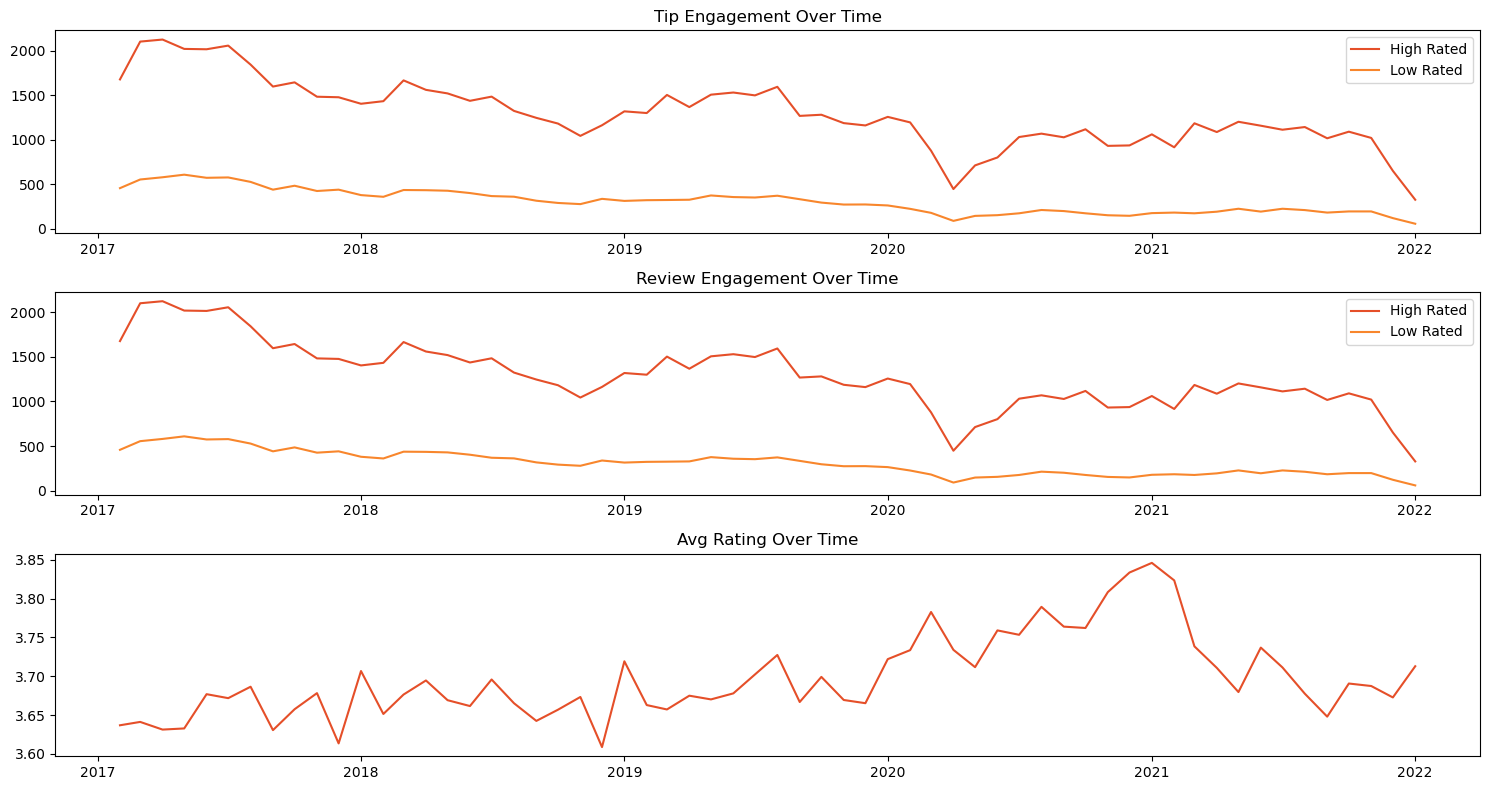

In [53]:
plt.figure(figsize=(15,8))
plt.subplot(3,1,1)
plt.title('Tip Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['tip_count'], label = 'High Rated', color = '#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['tip_count'], label = 'Low Rated', color = '#F8862C')
plt.legend()
plt.subplot(3,1,2)
plt.title('Review Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['tip_count'], label = 'High Rated', color = '#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['tip_count'], label = 'Low Rated', color = '#F8862C')
plt.legend()
plt.subplot(3,1,3)
plt.title('Avg Rating Over Time')
plt.plot(time_rating['month_year'], time_rating['avg_rating'], color = '#E54F29')
plt.tight_layout()
plt.show()

In [54]:
tip_high_rated = high_rated_engagement[['month_year', 'tip_count']].set_index('month_year')
review_high_rated = high_rated_engagement[['month_year', 'review_count']].set_index('month_year')
rating_df = time_rating[['month_year', 'avg_rating']].set_index('month_year')

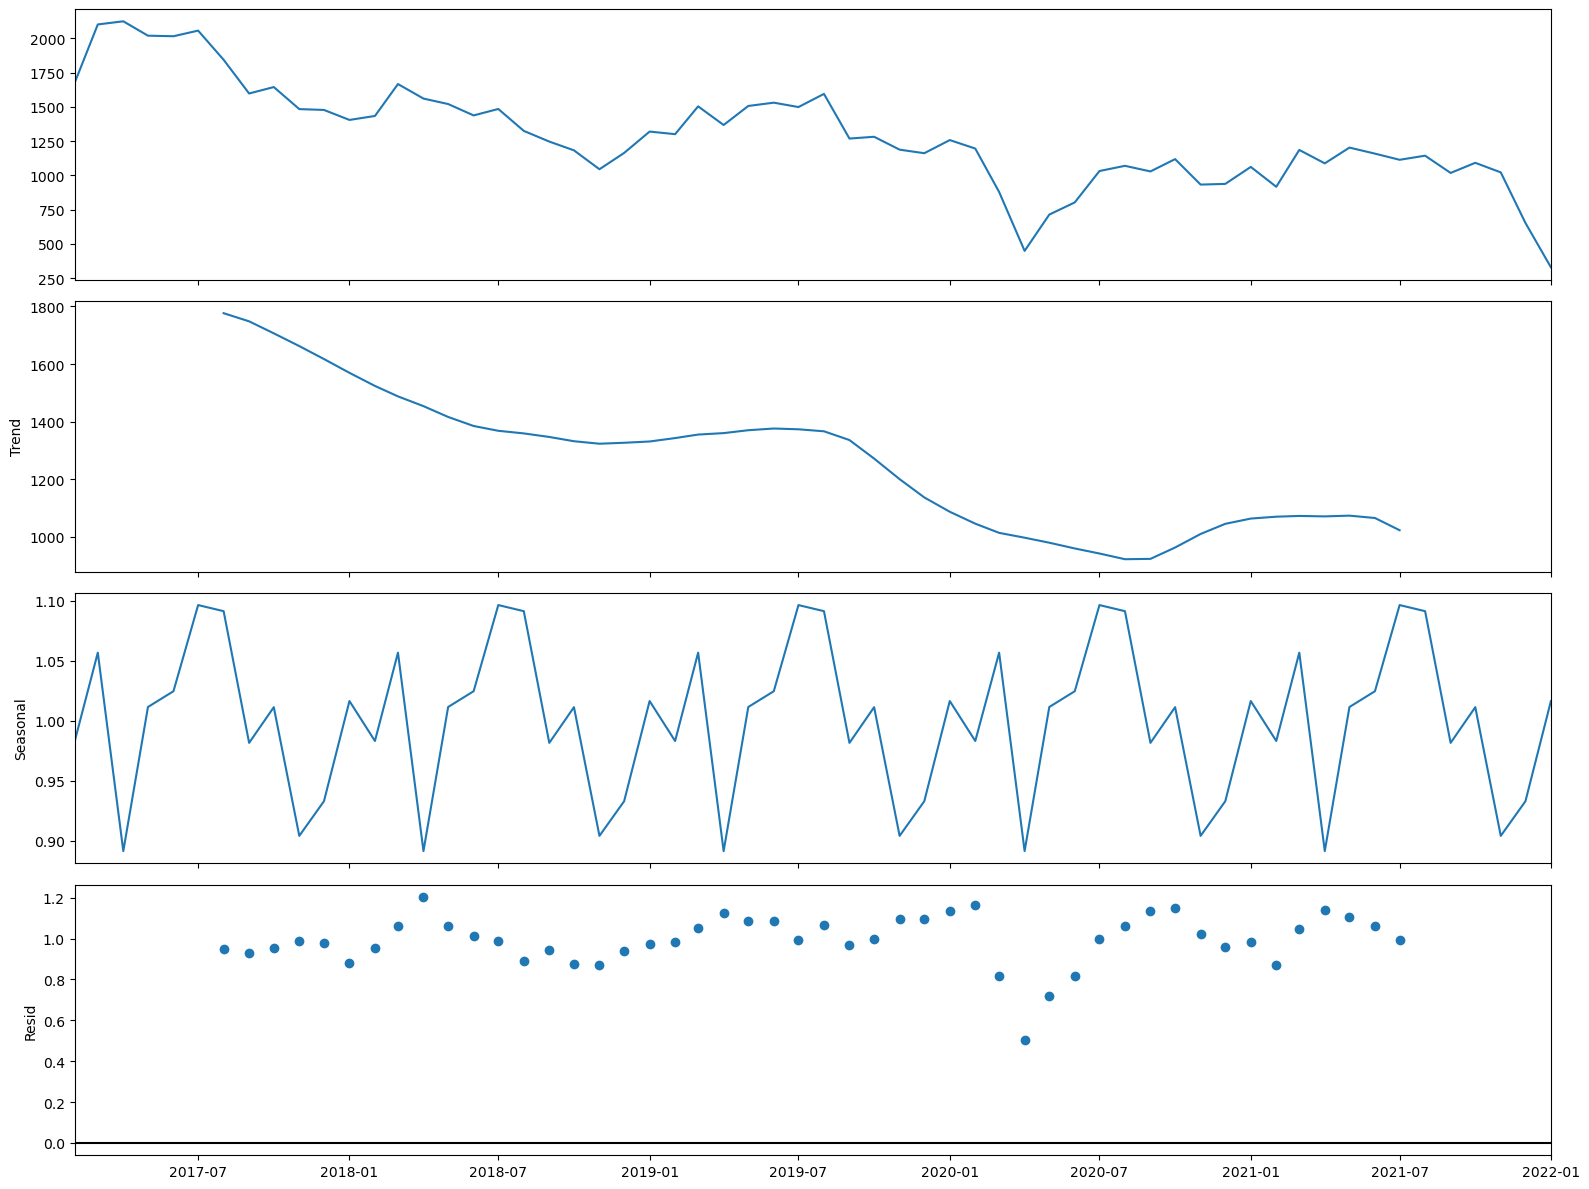

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Tip Analysis:
multiplicative_decomposition = seasonal_decompose(tip_high_rated,
                                                 model = 'multiplicative', period= 12)
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot()
plt.show()

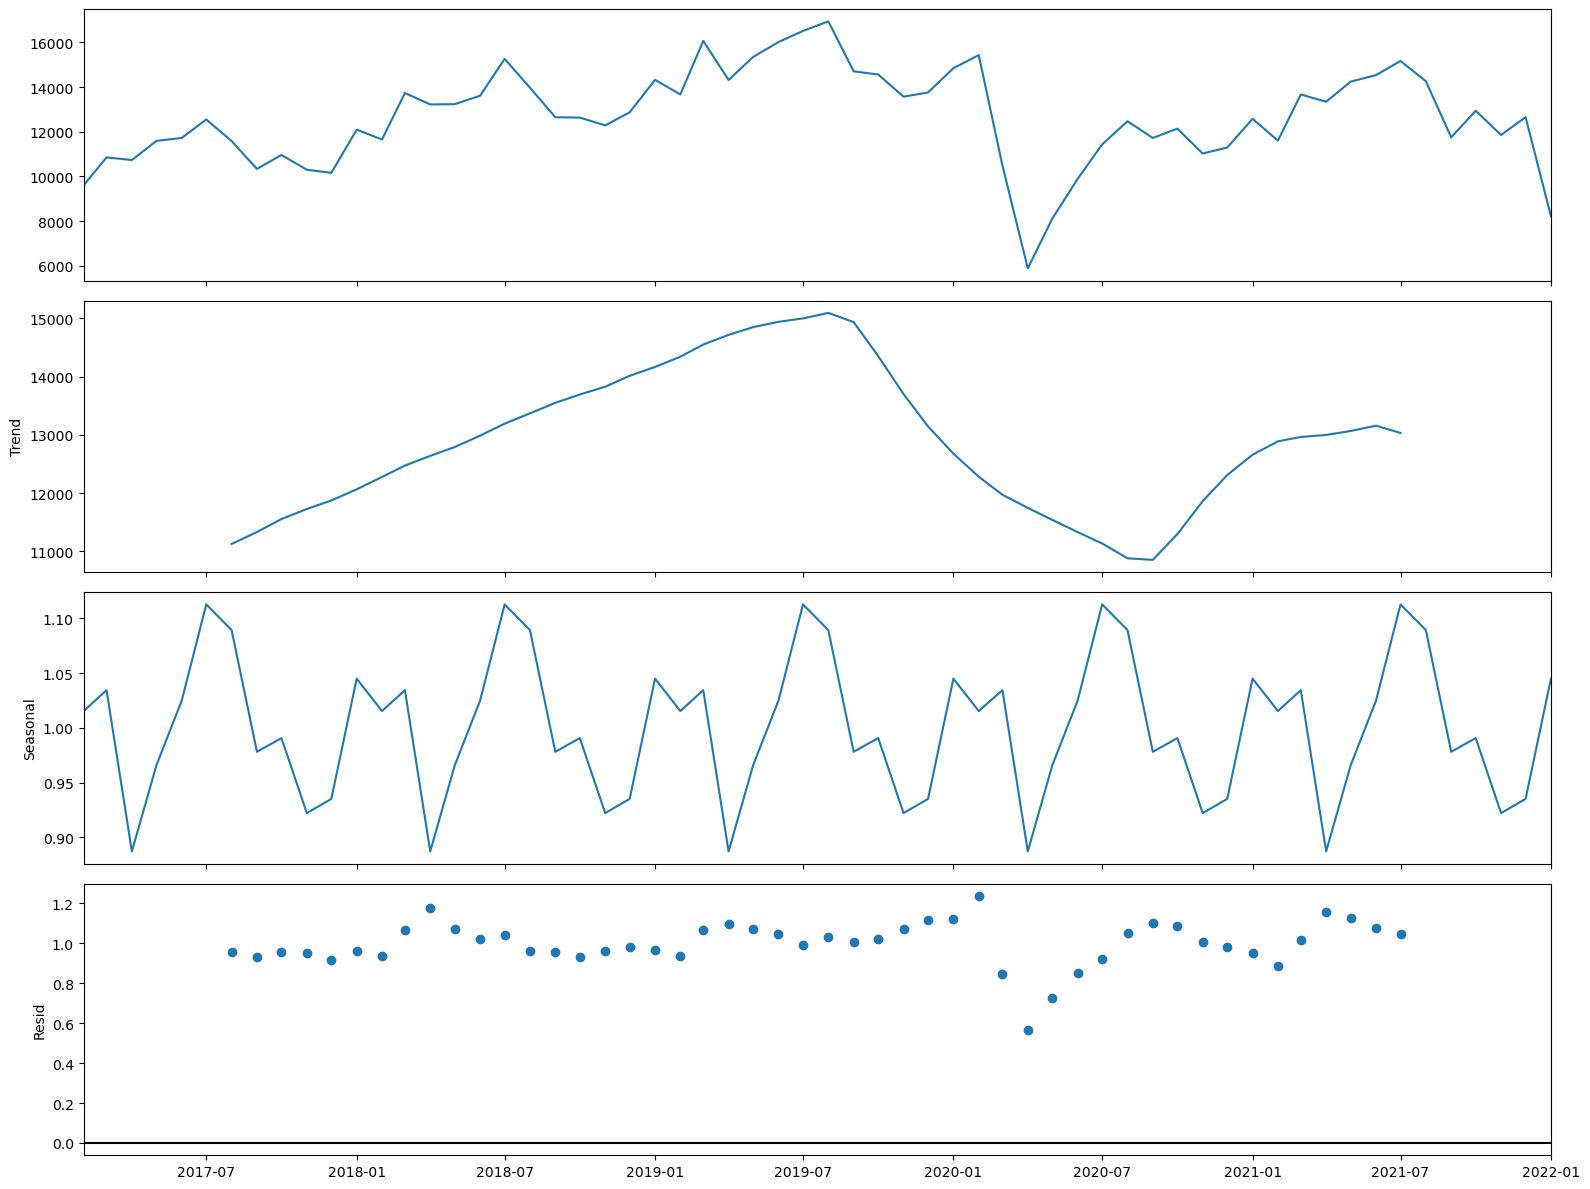

In [57]:
multiplicative_decomposition = seasonal_decompose(review_high_rated,
                                                 model = 'multiplicative', period= 12)
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot()
plt.show()

In [59]:
# How does the sentiments of reviews and tips (useful, funny, cool) correlate with the success metrics of restaurants ?

sentiment_df = pd.read_sql_query(f'''SELECT b.business_id, AVG(b.stars) AS avg_rating, SUM(b.review_count) AS review_count,
SUM(s.useful_count) AS useful_count,
SUM(s.funny_count) AS funny_count,
Sum(s.cool_count) AS cool_count
FROM
(SELECT business_id,
    SUM(useful) AS useful_count,
    SUM(funny) AS funny_count,
    SUM(cool) AS cool_count
FROM
    review
GROUP BY business_id) AS s
JOIN business AS b ON b.business_id = s.business_id

WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY b.business_id
ORDER BY review_count''', conn)

sentiment_df = remove_outliers(sentiment_df, 'review_count')
sentiment_df = remove_outliers(sentiment_df, 'useful_count')
sentiment_df = remove_outliers(sentiment_df, 'funny_count')
sentiment_df = remove_outliers(sentiment_df, 'cool_count')

In [60]:
sentiment_df['success_score'] = calculate_success_metric(sentiment_df)

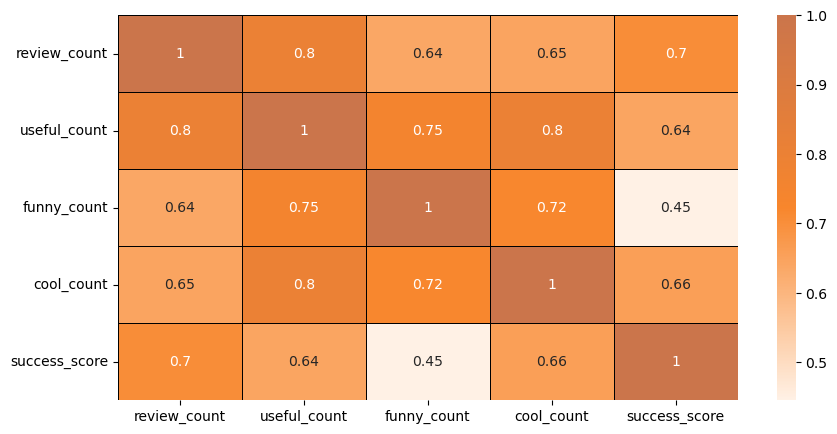

In [62]:
plt.figure(figsize=(10,5))
sns.heatmap(sentiment_df.iloc[:,2:].corr(), cmap = custom_cmap, annot = True, linewidths=0.5, linecolor='black')
plt.show()

In [63]:
# Is there any difference in engagement of elite users and non elite users ?
elite_df = pd.read_sql_query('''SELECT
    elite,
    COUNT(*) AS num_users,
    SUM(review_count) AS total_review_count
FROM
    (SELECT
        CASE
            WHEN elite = '' THEN 'Not Elite'
            ELSE 'Elite'
        END AS elite,
        u.review_count
    FROM
        user u) AS user_elite
GROUP BY
    elite;
''', conn)

In [64]:
elite_df

,elite,num_users,total_review_count
0,Elite,91198,20484441
1,Not Elite,1896699,26021235


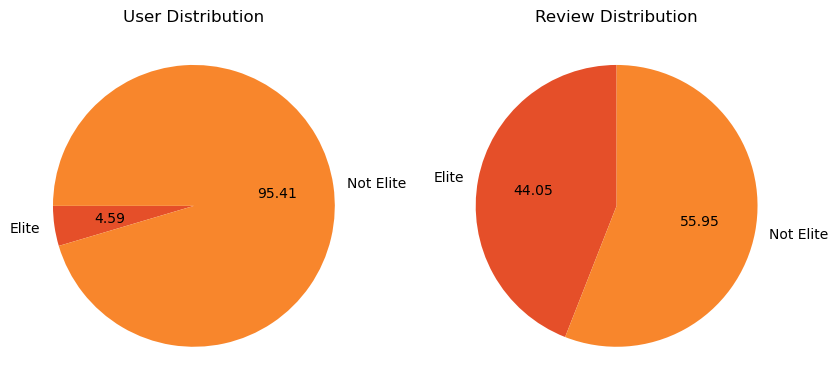

In [69]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('User Distribution')
plt.pie(elite_df['num_users'], labels = elite_df['elite'], autopct='%.2f', startangle= 180, colors= ['#E54F29', '#F8862C'])

plt.subplot(1,2,2)
plt.title('Review Distribution')
plt.pie(elite_df['total_review_count'], labels = elite_df['elite'], autopct='%.2f', startangle= 90, colors= ['#E54F29', '#F8862C'])
plt.show()

In [75]:
# What are the busiest hours for restaurants ?

review_engagement = pd.read_sql_query("""SELECT
    cast(strftime('%H', date) AS integer)
    AS hour,
    COUNT(*) AS review_count
FROM
    review
GROUP BY
    hour; """, conn)

tip_engagement = pd.read_sql_query("""SELECT
    cast(strftime('%H', date) AS integer)
    AS hour,
    COUNT(*) AS tip_count
FROM
    review
GROUP BY
    hour; """, conn)

checkin = pd.read_sql_query("""SELECT date FROM checkin """, conn)
checkin_engagement = []
for i in checkin ['date']:
    checkin_engagement.extend([datetime.strptime(j.strip(), "%Y-%m-%d %H:%M:%S").strftime("%H") for j in i.split(',')])

checkin_engagement = pd.DataFrame(checkin_engagement).astype('int').groupby(0)[[0]].count()

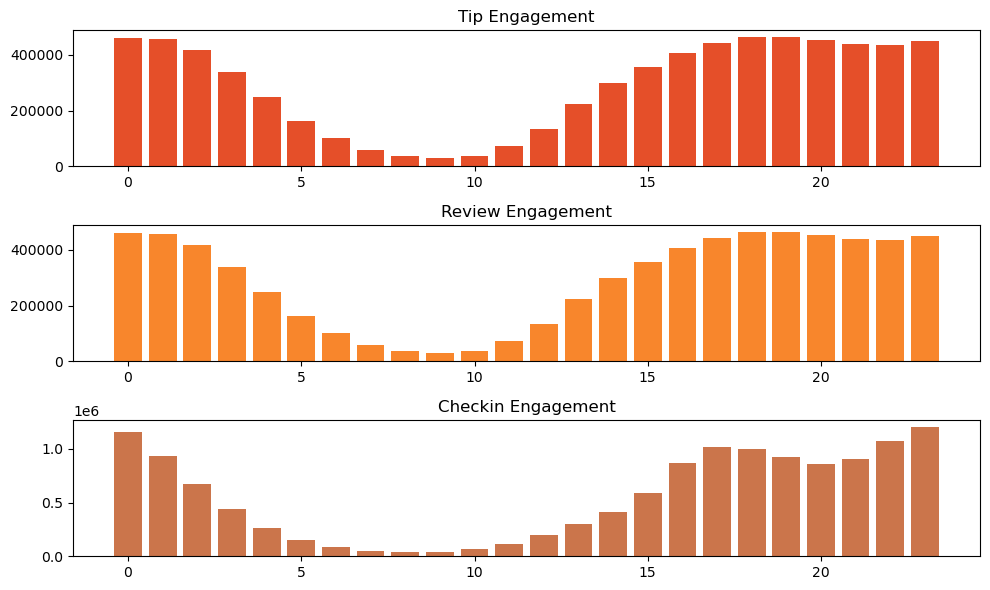

In [78]:
plt.figure(figsize= (10,6))
plt.subplot(3,1,1)
plt.title('Tip Engagement')
plt.bar(tip_engagement['hour'], tip_engagement['tip_count'], color = '#E54F29')
plt.subplot(3,1,2)
plt.title('Review Engagement')
plt.bar(review_engagement['hour'], review_engagement['review_count'], color = '#F8862C')
plt.subplot(3,1,3)
plt.title('Checkin Engagement')
plt.bar(checkin_engagement.index, checkin_engagement[0], color = '#CB754B')
plt.tight_layout()
plt.show()